<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering


----


### Import Libraries and Define Auxiliary Functions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


Read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


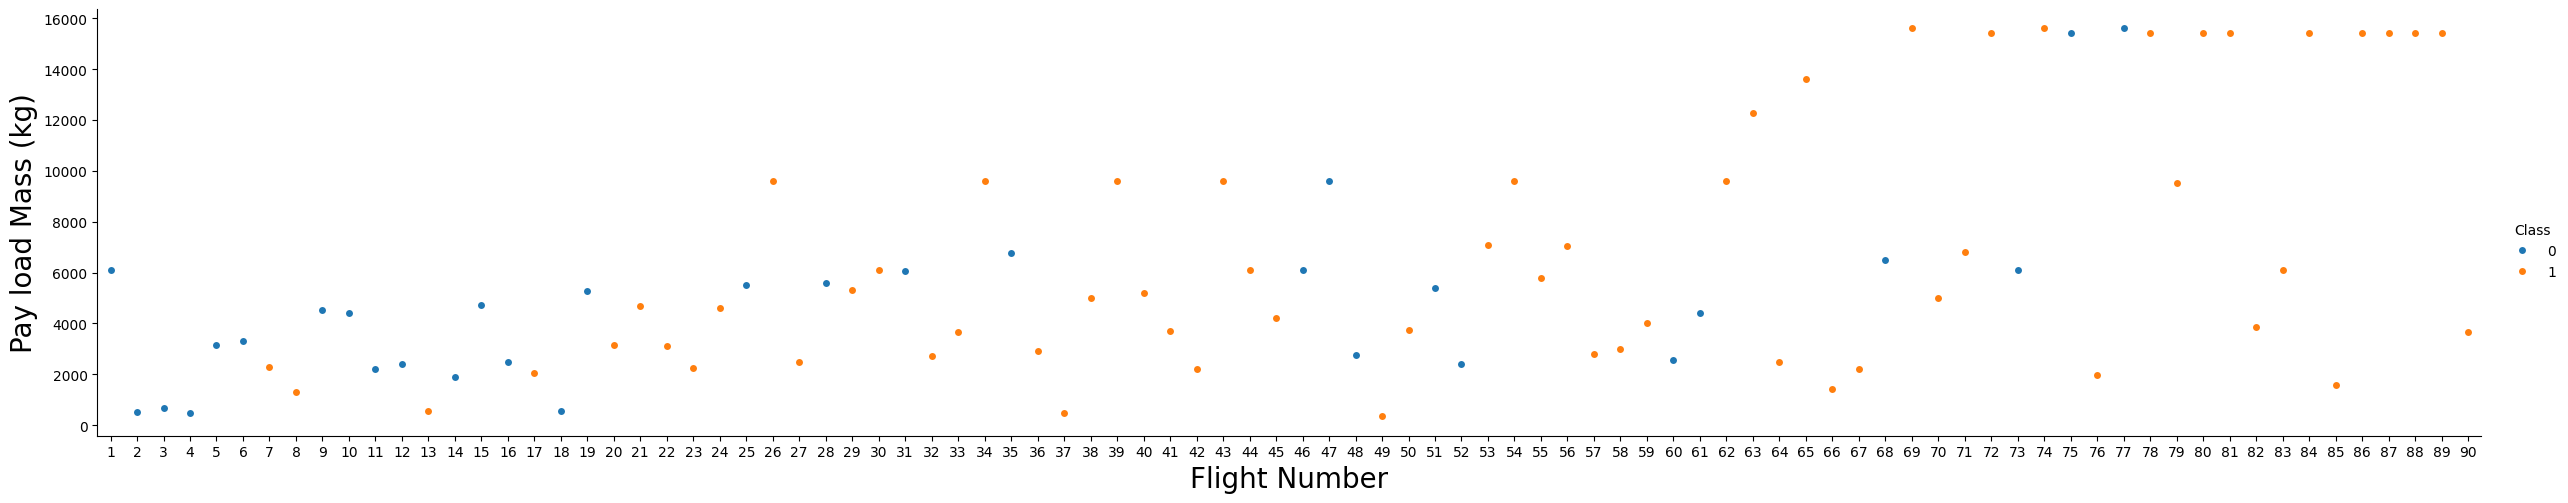

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## Success rates by "Launch Sites"

In [6]:
# Group the data by LaunchSite and calculate the mean of the 'Class' column
success_rates = df.groupby('LaunchSite')['Class'].mean() * 100

# Display the success rates
print(success_rates)


LaunchSite
CCAFS SLC 40    60.000000
KSC LC 39A      77.272727
VAFB SLC 4E     76.923077
Name: Class, dtype: float64


We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


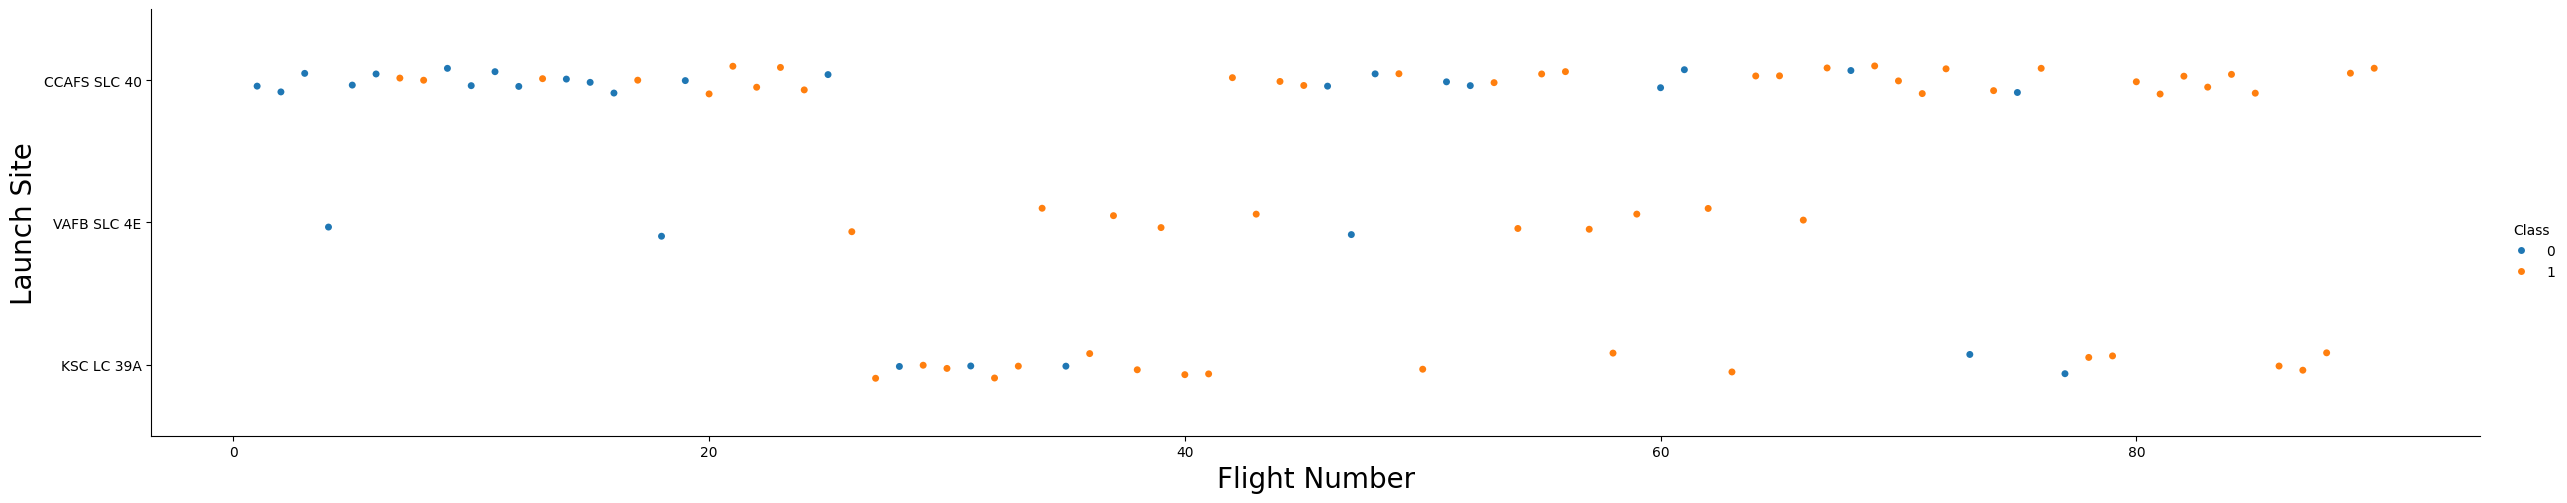

In [7]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y = "LaunchSite",x = "FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


1. Successes (Class = 1):
There is a higher concentration of orange dots for later flight numbers, suggesting that SpaceX had a higher success rate with later flights.
2. Differences Between Launch Sites:
CCAFS SLC-40: This site has a more balanced mix of successes and failures in the earlier flights but shows a higher success rate in the later flights (around flight numbers 60 and beyond).
VAFB SLC 4E: There is a more varied pattern with several failures (blue dots) scattered throughout the flight numbers. However, as the flight numbers increase, we see some successful landings as well.
KSC LC-39A: This site seems to have more successful landings (orange dots) across most flight numbers, indicating a relatively higher success rate.
3. Flight Number Trends: As the flight numbers increase (on the x-axis), the success rate seems to improve. This could suggest that SpaceX made improvements to its technology or procedures as the number of launches increased, leading to better outcomes.
For the earliest flight numbers (close to 0), you see more failures (blue dots), which might be indicative of early-stage experimentation and development.

Key Takeaway:
There appears to be a positive correlation between higher flight numbers and successful landings, especially at CCAFS SLC-40 and KSC LC-39A. Over time, the success rate seems to improve at all launch sites, although some sites (like VAFB SLC 4E) show more mixed results across flights.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


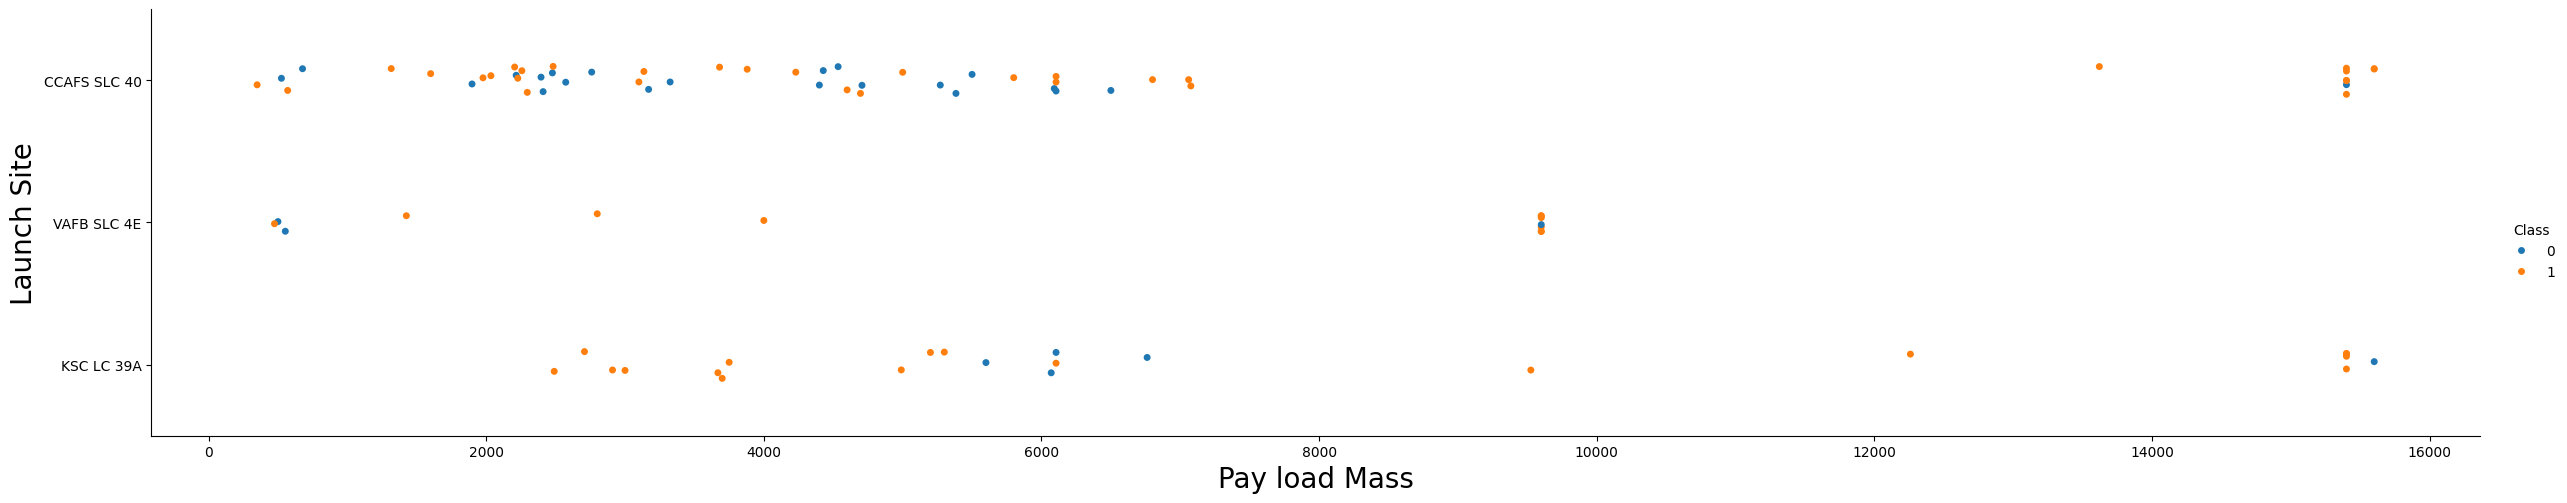

In [8]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

In this scatter plot of Payload Mass vs. Launch Site, where the hue indicates the Class (success or failure of the landing), we can observe several important trends:

Observations:
VAFB SLC 4E Launch Site:

No heavy payloads: There are no rockets launched from the VAFB SLC 4E site with a payload mass greater than 10,000 kg. All payloads at this site are lighter than 6,000 kg.
Mixed outcomes: The payloads launched from this site have a mixture of success (orange dots) and failure (blue dots) for landings, but the absence of heavy payloads suggests that this site may be reserved for lighter missions.
KSC LC-39A Launch Site:

Heaviest payloads: This site appears to handle the heaviest payloads, with several launches carrying payloads greater than 10,000 kg and even as high as 16,000 kg.
High success rate: Despite launching heavy payloads, KSC LC-39A has a relatively high number of successful landings (many orange dots), indicating that this launch site is well-equipped to handle heavier missions with a good success rate.
CCAFS SLC-40 Launch Site:

Diverse payload range: This site handles a wide range of payloads, from very light to medium-heavy (up to approximately 6,000 kg).
Balanced outcomes: There is a fairly balanced mix of successes and failures (orange and blue dots) across the payload mass range, indicating that both successful and unsuccessful landings are common here.
Key Insights:
VAFB SLC 4E seems to specialize in lighter payloads and does not handle heavy missions.
KSC LC-39A is equipped to handle heavy payloads, and despite the increased payload mass, it shows a higher success rate for landings.
CCAFS SLC-40 is more versatile, handling a wide variety of payloads, with success rates improving as payload mass increases.
Conclusion:
This plot suggests that the success of landings is not necessarily tied to the payload mass, particularly for the KSC LC-39A launch site. Additionally, the lack of heavy payloads at VAFB SLC 4E indicates a different role or capacity for that launch site compared to KSC LC-39A.

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


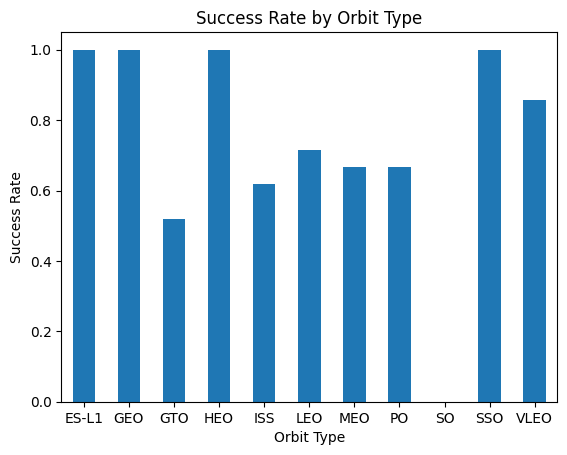

In [9]:
# HINT use groupby method on Orbit column and get the mean of Class column
success_rates = df.groupby('Orbit')['Class'].mean()

# create a bar chart of the success rates
success_rates.plot(kind='bar', rot=0)
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.show()

In the bar chart showing Success Rate by Orbit Type, we can analyze the success rates across different orbit types:

Observations:

Orbits with the Highest Success Rates (100%):

ES-L1: This orbit type shows a perfect success rate of 1.0 (100%). All missions targeted to ES-L1 have successfully completed.
GEO: Similar to ES-L1, this orbit type also shows a perfect success rate of 100%.
SSO: This orbit type also has a very high success rate, close to 100%.

Moderate Success Rates:

LEO (Low Earth Orbit): The success rate for LEO is approximately 70%, indicating that most missions targeting this orbit have been successful, but there is still a noticeable failure rate.
ISS: The success rate for missions aimed at the International Space Station (ISS) orbit is around 60%, which is moderate compared to some of the higher success orbits.

Lower Success Rates:

GTO (Geostationary Transfer Orbit): The success rate for GTO missions is around 50%, showing that missions aimed at this orbit are more likely to fail compared to other orbits.
HEO: High Earth Orbit missions also show a relatively low success rate, close to 50%.

Orbits with No Data:

PO, SO, VLEO: These orbits have no bars, which likely indicates that there is no data or no missions were aimed at these orbits in the dataset.
Key Insights:
Orbits like ES-L1, GEO, and SSO are highly successful, suggesting these are either easier or more stable mission profiles.
GTO and HEO missions, on the other hand, seem to present more challenges or risks, as evidenced by their lower success rates.
LEO missions, while common, still have a noticeable failure rate, indicating room for improvement in missions targeting this orbit.

Conclusion:
Success rates vary significantly by orbit type. Missions targeting ES-L1, GEO, and SSO orbits show high reliability, while those aimed at GTO and HEO have faced more challenges, leading to lower success rates. This kind of insight can guide future mission planning, especially for high-stakes or complex launches.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


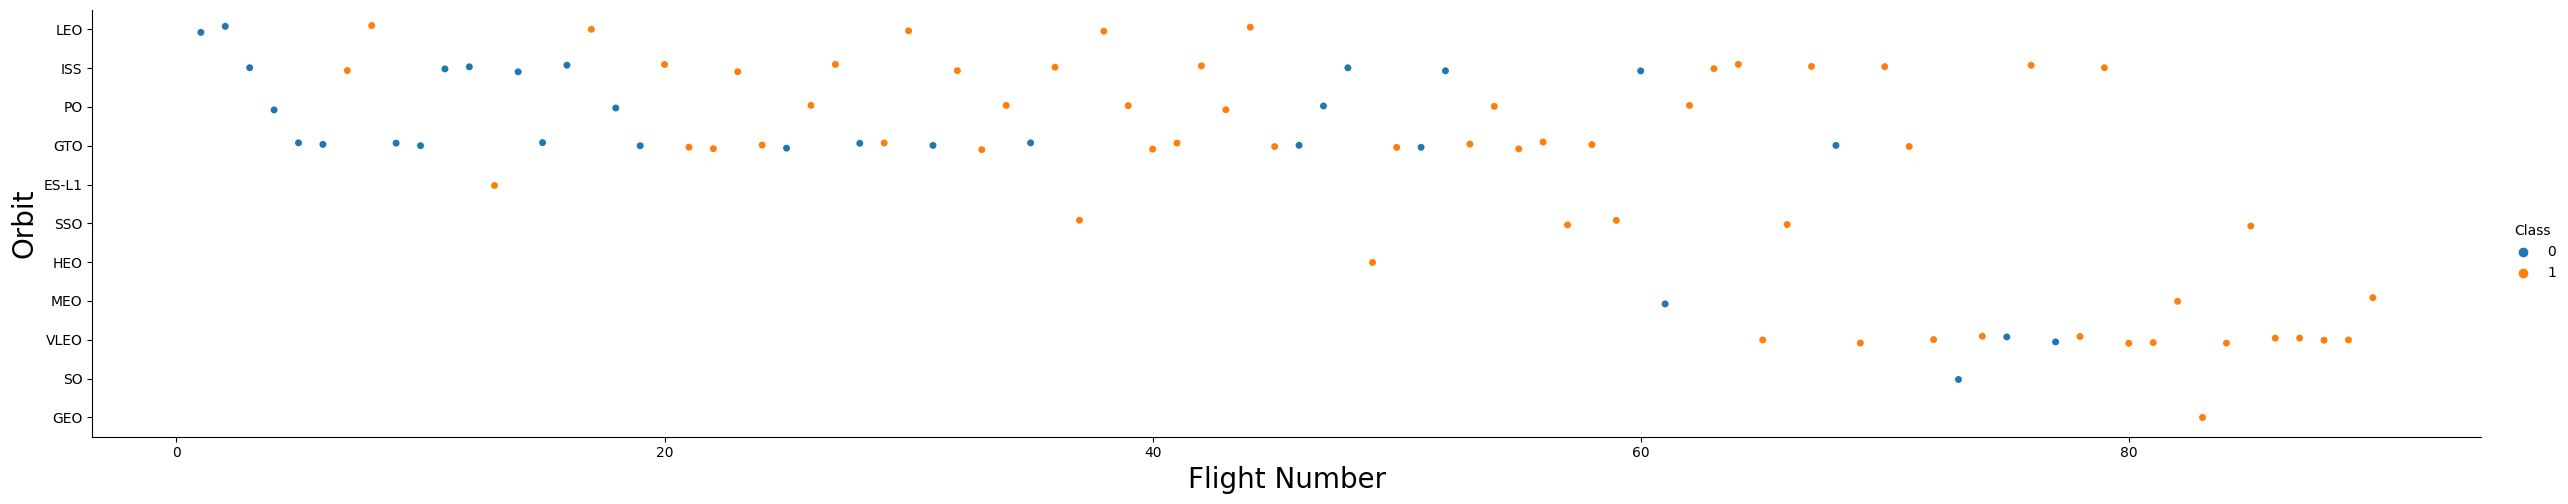

In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


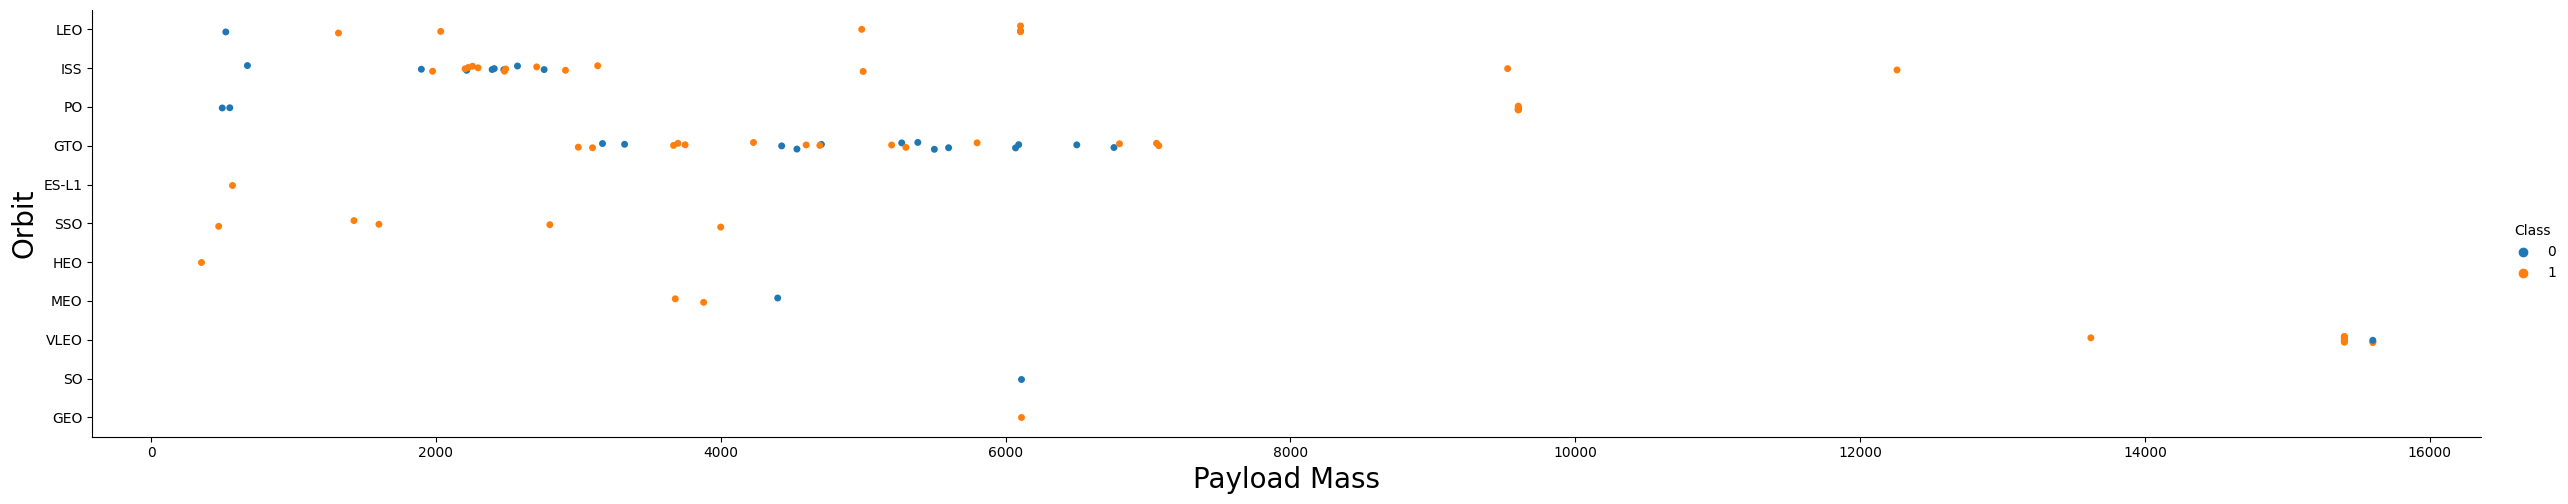

In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date
year=[]
def Extract_year(df):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
df['year'] = Extract_year(df)
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


<class 'pandas.core.series.Series'>


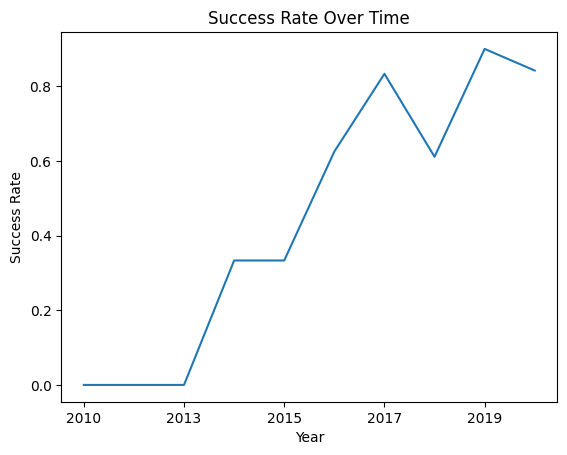

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
success_rates = df.groupby('year')['Class'].mean()
print(type(success_rates))

# create a line chart of the success rate over time
success_rates.plot(kind='line')
plt.title('Success Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns

to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# create a dataframe of the features to encode
features_to_encode = df[to_encode]

# apply OneHotEncoder to the features using get_dummies() function
features_one_hot = pd.get_dummies(features_to_encode)

# concatenate the one-hot encoded features with the original features
df = pd.concat([df.drop(to_encode, axis=1), features_one_hot], axis=1)

# display the resulting dataframe
print(df.head())
print(df.shape)

   FlightNumber        Date BoosterVersion  PayloadMass      Outcome  Flights  \
0             1  2010-06-04       Falcon 9  6104.959412    None None        1   
1             2  2012-05-22       Falcon 9   525.000000    None None        1   
2             3  2013-03-01       Falcon 9   677.000000    None None        1   
3             4  2013-09-29       Falcon 9   500.000000  False Ocean        1   
4             5  2013-12-03       Falcon 9  3170.000000    None None        1   

   GridFins  Reused   Legs  Block  ...  Serial_B1048  Serial_B1049  \
0     False   False  False    1.0  ...             0             0   
1     False   False  False    1.0  ...             0             0   
2     False   False  False    1.0  ...             0             0   
3     False   False  False    1.0  ...             0             0   
4     False   False  False    1.0  ...             0             0   

   Serial_B1050  Serial_B1051 Serial_B1054  Serial_B1056  Serial_B1058  \
0             0   

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

Orbit_ES-L1     float64
Orbit_GEO       float64
Orbit_GTO       float64
Orbit_HEO       float64
Orbit_ISS       float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 72, dtype: object

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
